In [148]:
import numpy as np
import pandas as pd

## Features half hour analysis

In [149]:
df_weather_hourly = pd.read_parquet(r'..\data\01_interim\weather_hourly_darksky_cleaned.parquet')

In [150]:
df_consumption_hourly = pd.read_parquet(r'..\data\02_processed\parquet\group_4_half_hourly.parquet')

In [151]:
df_consumption_hourly = df_consumption_hourly.drop(columns=['Date','Acorn_grouped'])

In [152]:
df = pd.merge(df_weather_hourly, df_consumption_hourly, left_index=True, right_on='DateTime').reset_index(drop=True)
df = df.drop(columns='apparentTemperature')

In [153]:
holidays = pd.read_csv(r'..\data\00_raw\uk_bank_holidays.csv')
holidays = pd.to_datetime(holidays['Bank holidays'])
df['is_holiday'] = df['DateTime'].dt.date.isin(holidays.dt.date)

In [154]:
# Extract hour, day of week, month, and day of year
df["hour"]      = df["DateTime"].dt.hour
df["dayofweek"] = df["DateTime"].dt.dayofweek
df["month"]     = df["DateTime"].dt.month
df["dayofyear"] = df["DateTime"].dt.dayofyear

In [ ]:
df.to_parquet(r'..\data\01_interim\half_hourly_data_processed.parquet')

## Features daily analysis

In [156]:
df_weather_daily = pd.read_parquet(r'..\data\01_interim\weather_daily_darksky_cleaned.parquet')

In [157]:
df_weather_daily = df_weather_daily.reset_index()

In [158]:
df_weather_daily.head()

,time,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-01,15.57,208,partly-cloudy-day,10.13,0.36,2.45,1009.46,15.57,rain,12.68,0.84,7.33,15.57,1.0,8.88,9.68,15.57,9.01,0.21
1,2011-11-02,15.19,134,partly-cloudy-night,10.23,0.39,4.39,1004.79,15.06,rain,11.83,0.87,13.99,15.19,1.0,13.99,8.88,15.06,7.33,0.24
2,2011-11-03,17.41,154,partly-cloudy-day,13.39,0.52,3.99,993.40,17.41,rain,12.15,0.89,12.52,17.41,1.0,12.52,12.79,17.41,12.79,0.27
3,2011-11-04,15.54,179,fog,12.03,0.50,2.62,995.54,15.54,rain,10.69,0.91,10.17,15.54,1.0,10.17,11.53,15.54,11.53,0.31
4,2011-11-05,13.94,346,fog,10.96,0.65,2.70,1007.39,13.94,rain,4.60,0.92,7.03,13.94,1.0,9.46,10.17,13.94,10.17,0.34


In [159]:
df_consumption_daily = pd.read_parquet(r'..\data\02_processed\parquet\group_4_daily.parquet')

In [160]:
df_consumption_daily = df_consumption_daily.drop(columns=['nb_pts'])

In [161]:
df_consumption_daily.head()

,Acorn,Date,nb_clients,Conso_kWh
0,ACORN-C,2012-07-01,74.000000,10.305622
1,ACORN-C,2012-07-02,73.979167,10.222741
2,ACORN-C,2012-07-03,73.020833,10.202942
3,ACORN-C,2012-07-04,73.375000,9.481093
4,ACORN-C,2012-07-05,74.979167,9.526791


In [162]:
df = pd.merge(df_weather_daily, df_consumption_daily, left_on='time', right_on='Date').drop(columns='time').reset_index(drop=True)


In [163]:
df.head()

,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,precipType,visibility,...,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Acorn,Date,nb_clients,Conso_kWh
0,12.40,238,partly-cloudy-day,7.73,0.45,2.95,1008.71,12.40,rain,12.49,...,1.0,5.57,7.66,12.40,5.47,0.49,ACORN-C,2012-10-29,148.000000,12.566655
1,12.40,238,partly-cloudy-day,7.73,0.45,2.95,1008.71,12.40,rain,12.49,...,1.0,5.57,7.66,12.40,5.47,0.49,ACORN-F,2012-10-29,678.958333,9.853808
2,12.40,238,partly-cloudy-day,7.73,0.45,2.95,1008.71,12.40,rain,12.49,...,1.0,5.57,7.66,12.40,5.47,0.49,ACORN-P,2012-10-29,109.000000,6.984853
3,10.92,259,partly-cloudy-day,5.00,0.45,2.37,1004.48,10.92,rain,11.25,...,1.0,6.45,5.57,10.92,3.44,0.52,ACORN-C,2012-10-30,147.979167,12.113133
4,10.92,259,partly-cloudy-day,5.00,0.45,2.37,1004.48,10.92,rain,11.25,...,1.0,6.45,5.57,10.92,3.44,0.52,ACORN-F,2012-10-30,679.895833,9.775306


In [164]:
df = df.drop(
    columns=[
        'apparentTemperatureHigh','temperatureHigh',
        'apparentTemperatureLow','temperatureLow',
        'apparentTemperatureMax','apparentTemperatureMin'
    ]
)

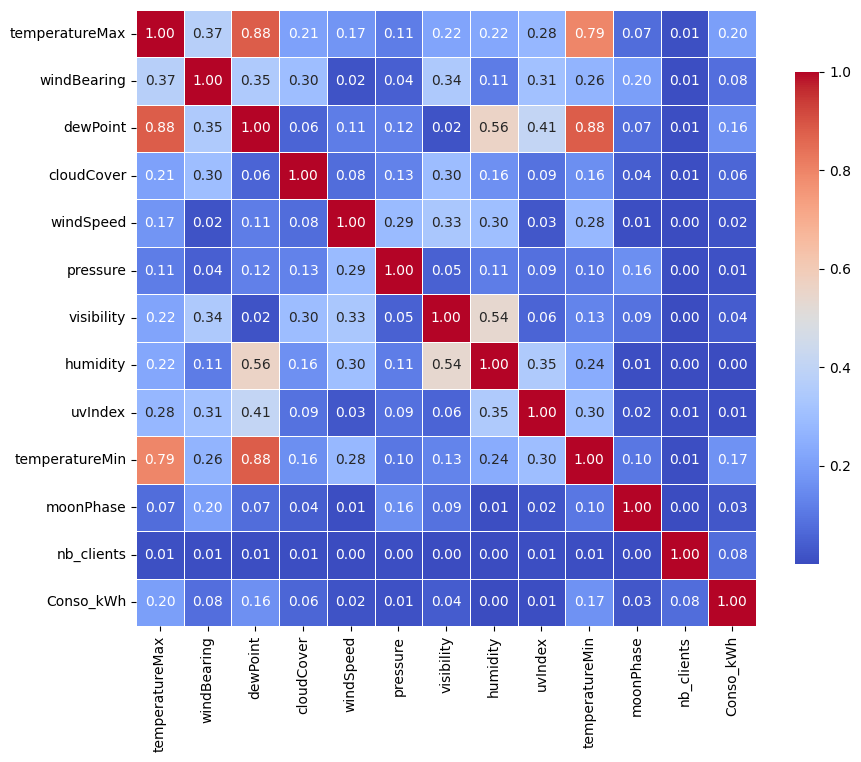

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True).abs(), 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar_kws={"shrink": .8})
plt.show()

In [ ]:
df.to_parquet(r'..\data\01_interim\daily_data_processed.parquet')